In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pickle
import os
import cv2
from sklearn.svm import SVC
from skimage.feature import daisy
import progressbar

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
sample = pd.read_csv('labels.csv')

In [3]:
sample2=sample[['Finding Labels']]

In [4]:
sample2.rename(columns={"Finding Labels": "labels"},inplace=True)

C:\Users\Unknown-D\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
sample2

,labels
0,Cardiomegaly
1,Cardiomegaly|Emphysema
2,Cardiomegaly|Effusion
3,No Finding
4,Hernia
...,...
112115,Mass|Pneumonia
112116,No Finding
112117,No Finding
112118,No Finding


In [6]:
for row in sample2.itertuples():
    if row.labels!="No Finding":
        sample2.iloc[row.Index]["labels"]="Found"
    else:
        sample2.iloc[row.Index]["labels"]="Not_Found"

In [7]:
labels = sample2["labels"].values.tolist()

In [8]:
labels = [label for label in labels]

In [9]:
labels

['Found',
 'Found',
 'Found',
 'Not_Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Found',
 'Found',
 'Not_Found',
 'Not_Found',
 'Found',
 'Not_Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Found',
 'Found',
 'Found',
 'Not_Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Not_Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Not_Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Not_Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Found',
 'Not_Found',
 'Found',
 'Found',
 'Not_Found',
 'Not_Found',
 'Not_Found',
 'Found',
 'Not_

In [ ]:
import cv2
resized_images = []
for dirname, _, filenames in os.walk('images/'):
    for filename in filenames:
        if not '.csv' in filename:
#             print(filename)
            file = cv2.imread(os.path.join(dirname, filename), cv2.IMREAD_GRAYSCALE)
            resized_images.append(cv2.resize(file, (512,512)))

In [ ]:
with open('resized_images.pkl', 'wb') as output:
    pickle.dump(resized_images, output, pickle.HIGHEST_PROTOCOL)

In [3]:
with open('resized_images.pkl', 'rb') as file:
    resized_images = pickle.load(file)

(-0.5, 320.5, 462.5, -0.5)

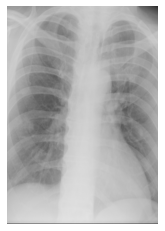

In [8]:
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(cv2.cvtColor(cropped[12], cv2.COLOR_BGR2RGB)); plt.axis('off')

In [9]:
# for image in resized_images:
#   cropped.append(image[y:h, x:w])
y=50
x=100
h=512
w=430
cropped = [image[y:h, x:w] for image in progressbar.progressbar(resized_images)]

100% (112120 of 112120) |################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
cropped

In [ ]:
croppedResize=[]
import cv2
for crap in cropped:
    croppedResize.append(cv2.resize(crap, (180,240)))

In [10]:
croppedResize

[array([[ 39,  39,  40, ...,  81,  80,  80],
        [ 41,  40,  40, ...,  88,  87,  86],
        [ 43,  42,  43, ...,  90,  95,  96],
        ...,
        [227, 228, 230, ..., 204, 203, 198],
        [231, 233, 232, ..., 210, 208, 206],
        [234, 234, 235, ..., 216, 214, 214]], dtype=uint8),
 array([[ 13,  13,  13, ...,  11,  10,   8],
        [ 13,  13,  13, ...,  12,  10,   9],
        [ 13,  13,  13, ...,  14,  12,  11],
        ...,
        [207, 210, 210, ..., 205, 204, 201],
        [207, 210, 212, ..., 203, 203, 201],
        [208, 211, 211, ..., 203, 203, 199]], dtype=uint8),
 array([[ 12,  14,  17, ...,  50,  48,  46],
        [ 18,  19,  19, ...,  55,  53,  50],
        [ 20,  20,  21, ...,  58,  56,  54],
        ...,
        [238, 239, 239, ..., 239, 240, 240],
        [239, 239, 239, ..., 240, 240, 239],
        [210, 211, 211, ..., 211, 211, 210]], dtype=uint8),
 array([[189, 191, 188, ..., 161, 156, 155],
        [185, 187, 186, ..., 152, 153, 155],
        [183, 18

In [9]:
with open('cropped.pkl', 'wb') as output:
    pickle.dump(cropped, output, pickle.HIGHEST_PROTOCOL)

In [2]:
with open('cropped.pkl', 'rb') as file:
    cropped = pickle.load(file)

In [3]:
import gc
gc.collect()

20

(-0.5, 329.5, 461.5, -0.5)

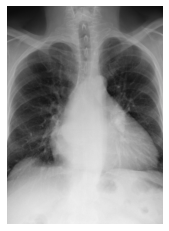

In [4]:
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(cv2.cvtColor(cropped[1], cv2.COLOR_BGR2RGB)); plt.axis('off')

In [ ]:
# import progressbar2
def feature_extraction(resized_images):
    alg = cv2.KAZE_create()
    features = []

    for image in resized_images:
        try:
            kps = alg.detect(image)
            kps = sorted(kps, key=lambda x: -x.response)
            kps, dsc = alg.compute(image, kps)
            dsc = dsc.flatten()
    #         print(type(dsc))

            features.append(dsc)
    #         print(dsc.shape)
            print(len(features))
        except Exception as e:
            print(e)
            print('image index: {}'.format(len(features)+1))
        
    return features

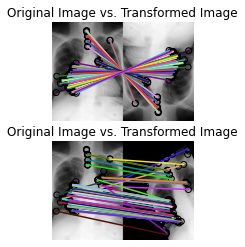

In [23]:
from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


img1 = cropped[1]
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image")


plt.show()

In [20]:
ORB_images=[]
from skimage import data
from skimage import transform
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [19]:
import gc
gc.collect()

20

In [ ]:
descriptor_extractor = ORB(n_keypoints=200)
for i,image in enumerate(cropped):
    try:
        descriptor_extractor.detect_and_extract(image)
        keypoints1 = descriptor_extractor.keypoints
        ORB_images.append( descriptor_extractor.descriptors)
    except:
        print(i)

90
117
120
121
122
123
127
128
138
140
141
142
143
144
145
146
147
149
154
155
156
157
158
159
172
174
335
390
452
454
455
457
462
474
477
481
523
533
534
535
536
680
695
702
1051
1053


In [16]:
len(ORB_images)

90

In [10]:
from joblib import Parallel, delayed

In [13]:
from skimage import data, color, util
from skimage.restoration import denoise_tv_chambolle
from skimage.feature import hog

# shared = []
def task(image):
    """
    Apply some functions and return an image.
    """
    fd= hog(image, orientations=9,
                        pixels_per_cell=(16, 16), cells_per_block=(2, 2),
                        visualize=False)
    # shared.append(hog_image)
    return fd.flatten()


# Prepare images
# hubble = data.hubble_deep_field()
# width = 10
# pics = util.view_as_windows(hubble, (width, hubble.shape[1], hubble.shape[2]), step=width)

In [14]:

 shared = []

for image in progressbar.progressbar(cropped):
    shared.append(task(image))


  0% (42 of 112120) |                    | Elapsed Time: 0:00:02 ETA:   2:03:15

KeyboardInterrupt: 

In [17]:
from skimage.feature import corner_fast, corner_peaks
import numpy as np

FAST=[]
for img in progressbar.progressbar(cropped):
    FAST.append(corner_peaks(corner_fast(img, 9), min_distance=1))

100% (112120 of 112120) |################| Elapsed Time: 0:20:33 Time:  0:20:33


[array([[151, 242]], dtype=int64),
 array([], shape=(0, 2), dtype=int64),
 array([], shape=(0, 2), dtype=int64),
 array([[148, 241],
        [150, 222]], dtype=int64),
 array([[70, 16],
        [70, 21],
        [71, 10],
        [73, 17],
        [73, 22],
        [74, 27],
        [75,  8],
        [75, 12],
        [78, 37],
        [80,  3],
        [80, 35],
        [85, 35],
        [88, 34]], dtype=int64),
 array([[ 94,  62],
        [ 94,  64],
        [ 97,  57],
        [ 97,  69],
        [ 99,  56],
        [ 99,  66],
        [100,  59],
        [100,  80],
        [101,  55],
        [103,  54],
        [104,  77],
        [108,  48],
        [109,  46],
        [109,  78],
        [110,  44],
        [113,  77],
        [115,  76],
        [119,  35],
        [124,  35]], dtype=int64),
 array([[ 86,  76],
        [ 87,  63],
        [ 87,  69],
        [ 90,  61],
        [ 90,  70],
        [ 90,  77],
        [ 90,  82],
        [ 91,  67],
        [ 92,  94],
        

In [85]:
with open('fast.pkl', 'wb') as output:
    pickle.dump(FAST, output, pickle.HIGHEST_PROTOCOL)

In [9]:
with open('fast.pkl', 'rb') as file:
    FAST = pickle.load(file)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# img = cropped
desc_list = []
for img in progressbar.progressbar(cropped):
    descs = daisy(img, step=180, radius=58, rings=2, histograms=6,
                             orientations=8, visualize=False)
    desc_list.append(descs.flatten())

# fig, ax = plt.subplots()
# ax.axis('off')
# ax.imshow(descs_img)
# descs_num = descs.shape[0] * descs.shape[1]
# ax.set_title('%i DAISY descriptors extracted:' % descs_num)
# plt.show()

In [17]:
FAST = np.asarray(FAST)
labels = np.asarray(labels)

In [132]:
flat_fast = []
for item in FAST:
    flat_fast.append(item.flatten())

In [47]:
flat_fast = np.asarray(flat_fast)

ValueError: could not broadcast input array from shape (2) into shape (1)

In [46]:
import numpy as np
flat_fast = np.array(flat_fast).reshape((1,-1))

ValueError: could not broadcast input array from shape (2) into shape (1)

In [86]:
maxi=0
ez=0
for i,m in enumerate(flat_fast):
    if len(m)>maxi:
        maxi=len(flat_fast[i])
        ez=i

In [110]:
flat_slow=[]

In [135]:
for i in range(len(flat_fast)):
    if len(flat_fast[i])<1468:
        tempy=(1468-len(flat_fast[i]))
        flat_fast[i] = np.pad(flat_fast[i],(0,tempy))
#         print(i)
#         print(flat_fast[i])


In [143]:
flat_fast=np.array(flat_fast)

In [147]:
flat_fast.shape

(112120, 1468)

In [145]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# fit model no training data
model = XGBClassifier(n_jobs=-1)
model.fit(flat_fast, labels)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

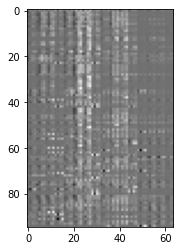

In [21]:
# Convert to grayscale
alg = cv2.KAZE_create()
kps = alg.detect(resized_images[12])
kps, dsc = alg.compute(resized_images[12], kps)


# Detect corners 


# Dilate corner image to enhance corner points


plt.imshow(dsc, cmap='gray')

In [ ]:
features = feature_extraction(resized_images[:100])